In [1]:
import matplotlib.pyplot as plt
import math
%matplotlib inline
import numpy as np
import random
from scipy.misc import comb

In [2]:
def silly_3():
    return 1 / 4.0 + float(int(random.random() * 3)) / 4.0

def normal(m, s):
    r = np.random.normal(loc=m, scale=s)
    if r < 0.0 or r > 1.0:
        return normal(m, s)
    return r

def normal_fixedp():
    return normal(0.5, 0.15)

def uniform():
    return random.random()

In [3]:
# normalized objectives by empirical stdevs
# TODO: some of the weights are negative...??
def experiment_histog(moments, stdevs, m):
    k = len(moments)
    from cvxopt import matrix, solvers
    solvers.options['show_progress'] = False
    A = np.zeros((m + 2 * k + 3, m + k + 1))
    B = np.zeros(m + 2 * k + 3)
    C = np.zeros(m + k + 1)
    # set C (optimization)
    for i in xrange(m + 1, m + k + 1):
        C[i] = 1.0
    # set B (constraints)
    B[0] = 1.0
    B[1] = -1.0
    for i in xrange(k):
        B[m + 3 + (2 * i)] = moments[i]
        B[m + 3 + (2 * i) + 1] = -1.0 * moments[i]
    # set A (linear coefficients)
    for i in xrange(m + 1):
        A[0][i] = 1.0
        A[1][i] = -1.0
        A[2 + i][i] = -1.0

    for j in xrange(k):
        A[m + 3 + (2 * j)][m + 1 + j] = -1.0
        A[m + 3 + (2 * j) + 1][m + 1 + j] = -1.0
        for i in xrange(m + 1):
            A[m + 3 + (2 * j)][i] = (((float(i) / float(m))) ** (j + 1))
            A[m + 3 + (2 * j) + 1][i] = (-1.0 * ((float(i) / float(m))) ** (j + 1))
    # print A
    G = matrix(np.ndarray.tolist(np.transpose(A)))
    h = matrix(np.ndarray.tolist(B))
    weights = np.zeros(m + k + 1)
    for i in xrange(k):
        weights[m + i + 1] = 1.0 / (stdevs[i] ** 2)
    P = matrix(np.ndarray.tolist(np.diag(weights)))
    q = matrix(np.ndarray.tolist(np.zeros(m + k + 1)))
    # print B
    # print C
    #sol = solvers.lp(matrix(np.ndarray.tolist(C)), matrix(np.ndarray.tolist(A)), matrix(np.ndarray.tolist(B)))
    sol = solvers.qp(P, q, G, h)
    #print np.dot(C, np.asarray(sol['x']))
    return sol['x']

def cdf(mesh):
    return np.cumsum(mesh)

def cdf_distro(sample_ps, granularity):
    ss = sorted(sample_ps)
    cdf = np.zeros(granularity + 1)
    for p in ss:
        cdf[int(p * granularity) + 1 : granularity + 1] += np.ones(granularity - int(p * granularity))
    cdf /= float(len(ss))
    return cdf

def cdf_dist(c0, c1):
    return np.sum(np.absolute(c0 - c1)) / float(len(c0) - 1)

def moments_stdevs(samples, k):
    n, s = samples.shape
    counts = np.sum(samples, axis=1)
    mom_dist = [np.asarray([float(comb(counts[j], i)) / float(comb(s, i)) for j in xrange(n)]) for i in xrange(1, k + 1)]
    moments = [np.mean(mom) for mom in mom_dist]
    stdevs = [np.std(mom) / math.sqrt(n) for mom in mom_dist]
    return moments, stdevs

def bernoulli(p):
        r = random.random()
        if r < p:
                return 1
        return 0

def gen(sample_ps, s):
        n = len(sample_ps)
        samples = np.zeros((n, s))
        for i in xrange(n):
                for j in xrange(s):
                        samples[i][j] = bernoulli(sample_ps[i])
        return samples

In [6]:
%pdb

Automatic pdb calling has been turned ON


In [24]:
# new try

spikes_full = []
spikes_emp = []

sample_ps = [silly_3() for i in xrange(10000)]

for j in xrange(20):
    print "RUN" + str(j)
    run_spikes_full = []
    run_spikes_emp = []
    for r in xrange(2, 16, 2):
        print "samples: " + str(r)
        samples = gen(sample_ps, r)
        n = len(samples)
        m, s = moments_stdevs(samples, r)
        total_cdf = experiment_histog(m, s, 2000)[:2001]
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        run_spikes_full.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
        run_spikes_emp.append(cdf_dist(cdf_distro(empirical_ps, 2000), cdf_distro(sample_ps, 2000)))
    spikes_full.append(np.asarray(run_spikes_full))
    spikes_emp.append(np.asarray(run_spikes_emp))

np.savetxt("spikes_full_gv_3.txt", spikes_full)
np.savetxt("spikes_emp_gv_3.txt", spikes_emp)

RUN0
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN1
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN2
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN3
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN4
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN5
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN6
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN7
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN8
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN9
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN10
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN11
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
sa

In [25]:
# new try

spikes_full = []
spikes_emp = []

sample_ps = [silly_3() for i in xrange(100000)]

for j in xrange(20):
    print "RUN" + str(j)
    run_spikes_full = []
    run_spikes_emp = []
    for r in xrange(2, 16, 2):
        print "samples: " + str(r)
        samples = gen(sample_ps, r)
        n = len(samples)
        m, s = moments_stdevs(samples, r)
        total_cdf = experiment_histog(m, s, 2000)[:2001]
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        y_mesh_h = cdf(total_cdf_h)
        run_spikes_full.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
        run_spikes_emp.append(cdf_dist(cdf_distro(empirical_ps, 2000), cdf_distro(sample_ps, 2000)))
    spikes_full.append(np.asarray(run_spikes_full))
    spikes_emp.append(np.asarray(run_spikes_emp))

np.savetxt("spikes_full_gv_2.txt", spikes_full)
np.savetxt("spikes_emp_gv_2.txt", spikes_emp)

RUN0
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN1
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN2
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN3
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN4
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN5
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN6
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN7
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN8
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN9
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN10
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN11
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
sa

In [12]:
# new try

normal_full = []
normal_emp = []

sample_ps = [normal_fixedp() for i in xrange(10000)]

for j in xrange(20):
    print "RUN" + str(j)
    run_normal_full = []
    run_normal_emp = []
    for r in xrange(2, 16, 2):
        print "samples: " + str(r)
        samples = gen(sample_ps, r)
        n = len(samples)
        m, s = moments_stdevs(samples, r)
        for i in xrange(r):
            s[i] = math.sqrt(m[i] * (i + 1))
        total_cdf = experiment_histog(m, s, 2000)[:2001]
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        y_mesh_h = cdf(total_cdf_h)
        run_normal_full.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
        run_normal_emp.append(cdf_dist(cdf_distro(empirical_ps, 2000), cdf_distro(sample_ps, 2000)))
    normal_full.append(np.asarray(run_normal_full))
    normal_emp.append(np.asarray(run_normal_emp))

np.savetxt("normal_full_gv_3.txt", normal_full)
np.savetxt("normal_emp_gv_3.txt", normal_emp)

RUN0
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN1
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN2
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN3
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN4
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN5
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN6
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN7
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN8
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN9
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN10
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN11
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
sa

In [13]:
# new try

uniform_full = []
uniform_half = []
uniform_emp = []

sample_ps = [uniform() for i in xrange(10000)]

for j in xrange(20):
    print "RUN" + str(j)
    run_uniform_full = []
    run_uniform_half = []
    run_uniform_emp = []
    for r in xrange(2, 16, 2):
        print "samples: " + str(r)
        samples = gen(sample_ps, r)
        n = len(samples)
        m, s = moments_stdevs(samples, r)
        for i in xrange(r):
            s[i] = math.sqrt(m[i] * (i + 1))
        m_h, s_h = m[: r/2], s[: r/2]
        total_cdf = experiment_histog(m, s, 2000)[:2001]
        total_cdf_h = experiment_histog(m_h, s_h, 2000)[:2001]
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        y_mesh_h = cdf(total_cdf_h)
        run_uniform_full.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
        run_uniform_half.append(cdf_dist(y_mesh_h, cdf_distro(sample_ps, 2000)))
        run_uniform_emp.append(cdf_dist(cdf_distro(empirical_ps, 2000), cdf_distro(sample_ps, 2000)))
    uniform_full.append(np.asarray(run_uniform_full))
    uniform_half.append(np.asarray(run_uniform_half))
    uniform_emp.append(np.asarray(run_uniform_emp))

np.savetxt("uniform_full_gv_3.txt", uniform_full)
np.savetxt("uniform_half_gv_3.txt", uniform_half)
np.savetxt("uniform_emp_gv_3.txt", uniform_emp)

RUN0
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN1
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN2
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN3
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN4
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN5
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN6
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN7
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN8
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN9
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN10
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
samples: 12
samples: 14
RUN11
samples: 2
samples: 4
samples: 6
samples: 8
samples: 10
sa

# normal_half

In [22]:
spikes_100k = []
spikes_10k = []
spikes_emp = []

sample_ps = [silly_3() for i in xrange(100000)]
smaller_sample_ps = sample_ps[:10000]

for j in xrange(100):
    print "RUN" + str(j)
    run_spikes_100k = []
    run_spikes_10k = []
    run_spikes_emp = []
    for r in xrange(2, 16):
        print "samples: " + str(r)
        samples = gen(sample_ps, r)
        n = len(samples)
        m, s = moments_stdevs(samples, r)
        total_cdf = experiment_histog(m, s, 2000)[:2001]
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        run_spikes_100k.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
        run_spikes_emp.append(cdf_dist(cdf_distro(empirical_ps, 2000), cdf_distro(sample_ps, 2000)))
    for r in xrange(2, 16):
        print "samples: " + str(r)
        samples = gen(smaller_sample_ps, r)
        n = len(samples)
        m, s = moments_stdevs(samples, r)
        for i in xrange(r):
            s[i] = math.sqrt(m[i] * (i + 1))
        total_cdf = experiment_histog(m, s, 2000)[:2001]
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        run_spikes_10k.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
    spikes_100k.append(np.asarray(run_spikes_100k))
    spikes_10k.append(np.asarray(run_spikes_10k))
    spikes_emp.append(np.asarray(run_spikes_emp))

np.savetxt("spikes_100k_wh.txt", spikes_100k)
np.savetxt("spikes_10k_wh.txt", spikes_10k)
np.savetxt("spikes_emp_wh.txt", spikes_emp)

RUN0
samples: 2


KeyboardInterrupt: 

In [32]:
%pdb

Automatic pdb calling has been turned OFF


In [36]:
normal_100k = []
normal_10k = []
normal_emp = []

sample_ps = [normal_fixedp() for i in xrange(100000)]
smaller_sample_ps = sample_ps[:10000]

for j in xrange(5):
    print "RUN" + str(j)
    run_normal_100k = []
    run_normal_10k = []
    run_normal_emp = []
    #for r in xrange(2, 16):
    for r in xrange(15, 16):
        print "samples: " + str(r)
        samples = gen(sample_ps, r)
        n = len(samples)
        m, s = moments_stdevs(samples, r)
        print s, j, r
        for i in xrange(r):
            s[i] = math.sqrt(m[i] * (i + 1))
        print s, j, r
        total_cdf = experiment_histog(m, s, 2000)[:2001]
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        run_normal_100k.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
        run_normal_emp.append(cdf_dist(cdf_distro(empirical_ps, 2000), cdf_distro(sample_ps, 2000)))
    """
    for r in xrange(2, 16):
        print "samples: " + str(r)
        samples = gen(smaller_sample_ps, r)
        n = len(samples)
        m, s = moments_stdevs(samples, r)
        for i in xrange(r):
            s[i] = math.sqrt(m[i] * (i + 1))
        total_cdf = experiment_histog(m, s, 2000)[:2001]
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        run_normal_10k.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
    """
    normal_100k.append(np.asarray(run_normal_100k))
    normal_10k.append(np.asarray(run_normal_10k))
    normal_emp.append(np.asarray(run_normal_emp))

np.savetxt("normal_100k_wh.txt", normal_100k)
np.savetxt("normal_10k_wh.txt", normal_10k)
np.savetxt("normal_emp_wh.txt", normal_emp)

RUN0
samples: 15
[0.00061231704452658969, 0.00063111468377762198, 0.00055074551030796965, 0.00046669444154056499, 0.00039756473837757159, 0.0003441977033363897, 0.00030375583299288003, 0.00027323527328421024, 0.00025022356141442693, 0.00023293863162785483, 0.00022011045270535495, 0.00021085758495889757, 0.00020459401488864227, 0.00020097023813932694, 0.00019984793969415844] 0 15
[0.7062289524887332, 0.7363085533350034, 0.687243322714295, 0.6215539311896349, 0.5571925189407186, 0.4995394522314172, 0.4497019197510909, 0.407273543122726, 0.3713633655205495, 0.3409985141902918, 0.31527923549925757, 0.29343003733971545, 0.2748069452231096, 0.2588873628948827, 0.2452549693686144] 0 15
RUN1
samples: 15
[0.00061038464521243573, 0.00063062023948165524, 0.00055108024844309933, 0.00046739509390388359, 0.00039830341920427716, 0.00034473540056342139, 0.00030393344011579661, 0.00027297005168513716, 0.00024949674618363749, 0.00023177757283591709, 0.00021857177680905299, 0.00020901450978177689, 0.0002

In [6]:
normal_100k = np.zeros(14)
normal_10k = np.zeros(14)
normal_emp = np.zeros(14)

sample_ps = [normal_fixedp() for i in xrange(100000)]
smaller_sample_ps = sample_ps[:10000]

for j in xrange(40):
    print "RUN" + str(j)
    run_normal_100k = []
    run_normal_10k = []
    run_normal_emp = []
    for r in xrange(2, 16):
        print "samples: " + str(r)
        samples = gen(sample_ps, r)
        n = len(samples)
        total_cdf = np.zeros((2001, 1))
        for i in xrange(10):
            subsample = np.asarray(samples)[np.random.randint(n, size=n/10)]
            m, s = moments_stdevs(subsample, r)
            nonzero = len(m)
            if 0.0 in m:
                nonzero = m.index(0.0)
            x = experiment_histog(m[:nonzero], s[:nonzero], 2000)
            total_cdf += np.asarray(x[:2001])
        total_cdf /= 10.0
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        run_normal_100k.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
        run_normal_emp.append(cdf_dist(cdf_distro(empirical_ps, 2000), cdf_distro(sample_ps, 2000)))
    for r in xrange(2, 16):
        print "samples: " + str(r)
        samples = gen(smaller_sample_ps, r)
        n = len(samples)
        total_cdf = np.zeros((2001, 1))
        for i in xrange(10):
            subsample = np.asarray(samples)[np.random.randint(n, size=n/10)]
            m, s = moments_stdevs(subsample, r)
            nonzero = len(m)
            if 0.0 in m:
                nonzero = m.index(0.0)
            x = experiment_histog(m[:nonzero], s[:nonzero], 2000)
            total_cdf += np.asarray(x[:2001])
        total_cdf /= 10.0
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        run_normal_10k.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
    normal_100k += np.asarray(run_normal_100k)
    normal_10k += np.asarray(run_normal_10k)
    normal_emp += np.asarray(run_normal_emp)
    
normal_100k /= 40.0
normal_10k /= 40.0
normal_emp /= 40.0

RUN0
samples: 2
samples: 3
samples: 4
samples: 5
samples: 6
samples: 7
samples: 8
samples: 9
samples: 10
samples: 11
samples: 12
samples: 13
samples: 14
samples: 15
samples: 2
samples: 3
samples: 4
samples: 5
samples: 6
samples: 7
samples: 8
samples: 9
samples: 10
samples: 11
samples: 12
samples: 13
samples: 14
samples: 15
RUN1
samples: 2
samples: 3
samples: 4
samples: 5
samples: 6
samples: 7
samples: 8
samples: 9
samples: 10
samples: 11
samples: 12
samples: 13
samples: 14
samples: 15
samples: 2
samples: 3
samples: 4
samples: 5
samples: 6
samples: 7
samples: 8
samples: 9
samples: 10
samples: 11
samples: 12
samples: 13
samples: 14
samples: 15
RUN2
samples: 2
samples: 3
samples: 4
samples: 5
samples: 6
samples: 7
samples: 8
samples: 9
samples: 10
samples: 11
samples: 12
samples: 13
samples: 14
samples: 15
samples: 2
samples: 3
samples: 4
samples: 5
samples: 6
samples: 7
samples: 8
samples: 9
samples: 10
samples: 11
samples: 12
samples: 13
samples: 14
samples: 15
RUN3
samples: 2
samples: 

In [7]:
np.savetxt("normal_100k.txt", normal_100k)
np.savetxt("normal_10k.txt", normal_10k)
np.savetxt("normal_emp.txt", normal_emp)

In [4]:
uniform_100k = np.zeros(14)
uniform_10k = np.zeros(14)
uniform_emp = np.zeros(14)

sample_ps = [uniform() for i in xrange(100000)]
smaller_sample_ps = sample_ps[:10000]

for j in xrange(40):
    print "RUN" + str(j)
    run_uniform_100k = []
    run_uniform_10k = []
    run_uniform_emp = []
    for r in xrange(2, 16):
        print "samples: " + str(r)
        samples = gen(sample_ps, r)
        n = len(samples)
        total_cdf = np.zeros((2001, 1))
        for i in xrange(10):
            subsample = np.asarray(samples)[np.random.randint(n, size=n/10)]
            m, s = moments_stdevs(subsample, r)
            nonzero = len(m)
            if 0.0 in m:
                nonzero = m.index(0.0)
            x = experiment_histog(m[:nonzero], s[:nonzero], 2000)
            total_cdf += np.asarray(x[:2001])
        total_cdf /= 10.0
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        run_uniform_100k.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
        run_uniform_emp.append(cdf_dist(cdf_distro(empirical_ps, 2000), cdf_distro(sample_ps, 2000)))
    for r in xrange(2, 16):
        print "samples: " + str(r)
        samples = gen(smaller_sample_ps, r)
        n = len(samples)
        total_cdf = np.zeros((2001, 1))
        for i in xrange(10):
            subsample = np.asarray(samples)[np.random.randint(n, size=n/10)]
            m, s = moments_stdevs(subsample, r)
            nonzero = len(m)
            if 0.0 in m:
                nonzero = m.index(0.0)
            x = experiment_histog(m[:nonzero], s[:nonzero], 2000)
            total_cdf += np.asarray(x[:2001])
        total_cdf /= 10.0
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        run_uniform_10k.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
    uniform_100k += np.asarray(run_uniform_100k)
    uniform_10k += np.asarray(run_uniform_10k)
    uniform_emp += np.asarray(run_uniform_emp)
    
uniform_100k /= 40.0
uniform_10k /= 40.0
uniform_emp /= 40.0

RUN0
samples: 2
samples: 3
samples: 4
samples: 5
samples: 6
samples: 7
samples: 8
samples: 9
samples: 10
samples: 11
samples: 12
samples: 13
samples: 14
samples: 15
samples: 2
samples: 3
samples: 4
samples: 5
samples: 6
samples: 7
samples: 8
samples: 9
samples: 10
samples: 11
samples: 12
samples: 13
samples: 14
samples: 15
RUN1
samples: 2
samples: 3
samples: 4
samples: 5
samples: 6
samples: 7
samples: 8
samples: 9
samples: 10
samples: 11
samples: 12
samples: 13
samples: 14
samples: 15
samples: 2
samples: 3
samples: 4
samples: 5
samples: 6
samples: 7
samples: 8
samples: 9
samples: 10
samples: 11
samples: 12
samples: 13
samples: 14
samples: 15
RUN2
samples: 2
samples: 3
samples: 4
samples: 5
samples: 6
samples: 7
samples: 8
samples: 9
samples: 10
samples: 11
samples: 12
samples: 13
samples: 14
samples: 15
samples: 2
samples: 3
samples: 4
samples: 5
samples: 6
samples: 7
samples: 8
samples: 9
samples: 10
samples: 11
samples: 12
samples: 13
samples: 14
samples: 15
RUN3
samples: 2
samples: 

In [5]:
np.savetxt("uniform_100k.txt", uniform_100k)
np.savetxt("uniform_10k.txt", uniform_10k)
np.savetxt("uniform_emp.txt", uniform_emp)

In [ ]:
uniform_100k = np.zeros(14)
uniform_10k = np.zeros(14)
uniform_emp = np.zeros(14)

sample_ps = [silly_3() for i in xrange(100000)]
smaller_sample_ps = sample_ps[:10000]

for j in xrange(40):
    print "RUN" + str(j)
    run_uniform_100k = []
    run_uniform_10k = []
    run_uniform_emp = []
    for r in xrange(2, 16):
        print "samples: " + str(r)
        samples = gen(sample_ps, r)
        n = len(samples)
        total_cdf = np.zeros((2001, 1))
        for i in xrange(10):
            subsample = np.asarray(samples)[np.random.randint(n, size=n/10)]
            m, s = moments_stdevs(subsample, r)
            nonzero = len(m)
            if 0.0 in m:
                nonzero = m.index(0.0)
            x = experiment_histog(m[:nonzero], s[:nonzero], 2000)
            total_cdf += np.asarray(x[:2001])
        total_cdf /= 10.0
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        run_uniform_100k.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
        run_uniform_emp.append(cdf_dist(cdf_distro(empirical_ps, 2000), cdf_distro(sample_ps, 2000)))
    for r in xrange(2, 16):
        print "samples: " + str(r)
        samples = gen(smaller_sample_ps, r)
        n = len(samples)
        total_cdf = np.zeros((2001, 1))
        for i in xrange(10):
            subsample = np.asarray(samples)[np.random.randint(n, size=n/10)]
            m, s = moments_stdevs(subsample, r)
            nonzero = len(m)
            if 0.0 in m:
                nonzero = m.index(0.0)
            x = experiment_histog(m[:nonzero], s[:nonzero], 2000)
            total_cdf += np.asarray(x[:2001])
        total_cdf /= 10.0
        empirical_ps = np.asarray([(float(sum(row)) / float(len(row))) for row in samples])
        y_mesh = cdf(total_cdf)
        run_uniform_10k.append(cdf_dist(y_mesh, cdf_distro(sample_ps, 2000)))
    uniform_100k += np.asarray(run_uniform_100k)
    uniform_10k += np.asarray(run_uniform_10k)
    uniform_emp += np.asarray(run_uniform_emp)
    
uniform_100k /= 40.0
uniform_10k /= 40.0
uniform_emp /= 40.0

In [84]:
X = np.loadtxt("normal_full_gv.txt")
Y = np.loadtxt("normal_half_gv.txt")
Z = np.loadtxt("normal_emp_gv.txt")

In [100]:
X[:,10]

array([ 0.00448305,  0.0493829 ,  0.03837618,  0.01395582,  0.00717754,
        0.01202399,  0.02822504,  0.00577797,  0.0094    ,  0.00524753,
        0.01326462,  0.03479866,  0.05069346,  0.02191757,  0.0206524 ,
        0.04998316,  0.00303547,  0.01643893,  0.00981938,  0.00623275,
        0.01743954,  0.00479692,  0.01751168,  0.02977193,  0.0229224 ,
        0.0145017 ,  0.01697615,  0.02313768,  0.05636329,  0.00478049,
        0.03442428,  0.02976406,  0.00222432,  0.03433779,  0.00778556,
        0.00286759,  0.00340731,  0.01740407,  0.02080303,  0.00756601,
        0.00511564,  0.00498393,  0.01820131,  0.00290854,  0.01367231,
        0.01305261,  0.02759888,  0.00663555,  0.01266858,  0.0184104 ])

In [97]:
A = np.mean(X, axis=0)
B = np.mean(Y, axis=0)
C = np.mean(Z, axis=0)

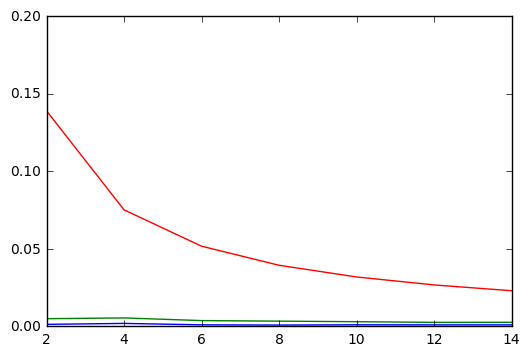

In [2]:
X = np.loadtxt("uniform_full_gv_2.txt")
Y = np.loadtxt("uniform_full_gv_3.txt")
Z = np.loadtxt("uniform_emp_gv_2.txt")
A = np.median(X, axis=0)
B = np.median(Y, axis=0)
C = np.median(Z, axis=0)
axes = plt.gca()
axes.set_ylim([0.0, 0.20])
plt.plot(range(2, 16, 2), A)
plt.plot(range(2, 16, 2), B)
plt.plot(range(2, 16, 2), C)

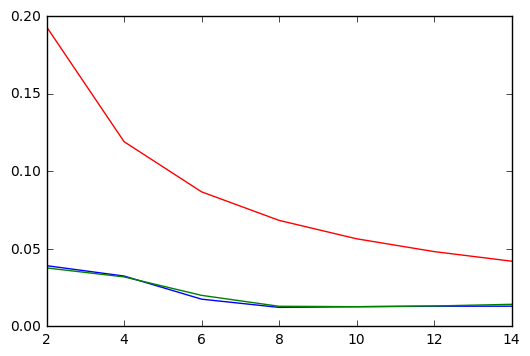

In [3]:
X = np.loadtxt("normal_full_gv_2.txt")
Y = np.loadtxt("normal_full_gv_3.txt")
Z = np.loadtxt("normal_emp_gv_2.txt")
A = np.median(X, axis=0)
B = np.median(Y, axis=0)
C = np.median(Z, axis=0)
axes = plt.gca()
axes.set_ylim([0.0, 0.20])
plt.plot(range(2, 16, 2), A)
plt.plot(range(2, 16, 2), B)
plt.plot(range(2, 16, 2), C)

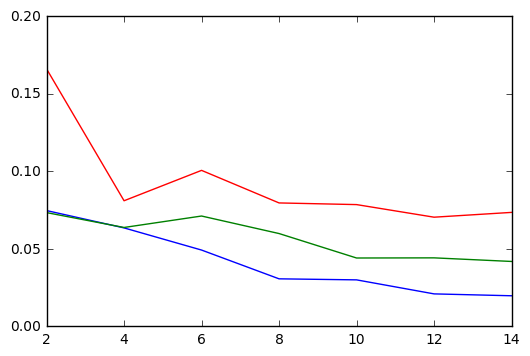

In [4]:
X = np.loadtxt("spikes_full_gv_2.txt")
Y = np.loadtxt("spikes_full_gv_3.txt")
Z = np.loadtxt("spikes_emp_gv_2.txt")
A = np.median(X, axis=0)
B = np.median(Y, axis=0)
C = np.median(Z, axis=0)
axes = plt.gca()
axes.set_ylim([0.0, 0.20])
plt.plot(range(2, 16, 2), A)
plt.plot(range(2, 16, 2), B)
plt.plot(range(2, 16, 2), C)

In [21]:
X

array([[ 0.08433136,  0.07517382,  0.06623701,  0.06625803,  0.06544949,
         0.06475159,  0.06295306],
       [ 0.08447209,  0.07495788,  0.06648016,  0.06571382,  0.06572726,
         0.06439317,  0.06350901],
       [ 0.08595148,  0.0757853 ,  0.06548693,  0.06610854,  0.0658029 ,
         0.06453762,  0.06332971],
       [ 0.08479101,  0.07550083,  0.06580695,  0.06675546,  0.06508993,
         0.06342494,  0.06361578],
       [ 0.08527583,  0.07637121,  0.06590452,  0.06639789,  0.06533222,
         0.06404515,  0.06310691],
       [ 0.08433419,  0.07557336,  0.06498982,  0.06655423,  0.06593169,
         0.06375811,  0.06302905],
       [ 0.0848673 ,  0.07506153,  0.06695904,  0.06606562,  0.06597025,
         0.06370617,  0.06353779],
       [ 0.08413906,  0.07460701,  0.0659536 ,  0.06614881,  0.06738792,
         0.0640352 ,  0.0634266 ],
       [ 0.08495283,  0.07575064,  0.06632887,  0.06677278,  0.06674278,
         0.06301419,  0.06306608],
       [ 0.08485079,  0.0745